In [1]:
#напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [40]:
#функція hypothesis(A, B, X)=theta*x+b

#де 
#* a - вектор вагових коефіцієнтів,
#* b - вектор вагових коефіцієнтів,
#* x - вектор-стовпець векторів ознак

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

def hypothesis(A, B, X):
        return np.dot(X, A) + B

In [27]:
# створіть функцію для обчислення функції втрат у векторному вигляді

In [43]:
#Функція
#(A, B=0, X, Y)=(1 / (2 * m)) * np.sum(error**2)

#де 
#* a - вектор вагових коефіцієнтів,
#* b - вектор вагових коефіцієнтів,
#* m - кількість навчальних прикладів,
#* h -  функція гіпотези лінійної регресії,
#* error - різниця між прогнозованими значеннями h та фактичними цільовими значеннями Y,
#* Y - вектор цільових значень,
#* X - матриця ознак

In [14]:
def compute_cost(A, B, X, Y):
    m = len(Y)
    error = hypothesis(A, B, X) - Y
    return (1 / (2 * m)) * np.sum(error**2)

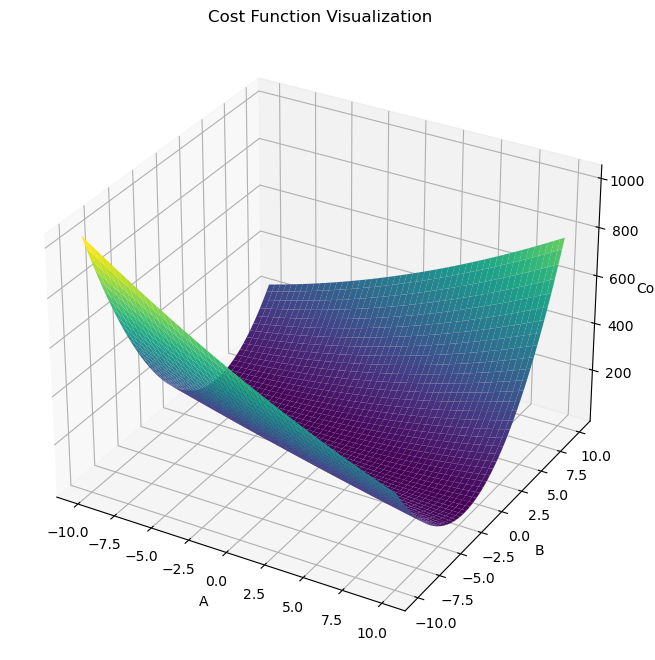

In [54]:
def visuilisation(X = np.array([1, 2, 3, 4, 5], dtype=float), Y = np.array([1, 3, 2, 3, 5], dtype=float), size_a=10, size_b=10):
    A_range = np.linspace(-size_a, size_a, 200)
    B_range = np.linspace(-size_b, size_b, 200)
    A_values, B_values = np.meshgrid(A_range, B_range)
    cost_values = np.zeros(A_values.shape)
    for i in range(A_range.size):
        for j in range(B_range.size):
            cost_values[i, j] = compute_cost(A_range[i], B_range[j], X, Y)
    
    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(A_values, B_values, cost_values, cmap='viridis')
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('Cost')
    ax.set_title('Cost Function Visualization')
    return plt.show()

visuilisation()

In [55]:
# реалізуйте один крок градієнтного спуску

In [52]:
#gradient_descent_step(A, B, X, Y, alpha)=theta - alpha * gradient

#* a - вектор вагових коефіцієнтів,
#* b - ваговий коефіцієнт,
#* X - матриця ознак,
#* Y - вектор цільових значень,
#* step - коефіцієнт швидкості навчання,
#* error - різниця між прогнозованими значеннями h і фактичними цільовими значеннями Y

In [53]:
def gradient_descent_step(A, B, X, Y, step):
    error = hypothesis(A, B, X) - Y
    for i in range(len(A)):
        A[i] -= (error * X[:,i]).sum() * step
    B -= error.sum() * step
    return A, B

In [19]:
# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [23]:
#підготовка даних для обчислень

In [24]:
file_path = "./Housing.csv"
df = pd.read_csv(file_path)
selected_features = ['area', 'bedrooms', 'bathrooms']
x = df[selected_features].values
y = df['price'].values

In [45]:
# нормалізації normalization(data)=normalized_data
#*data - це список значень, які ви хочете нормалізувати,
#*mean - середнє значення,
#*value_range - діапазон значень у списку данихб
#* normalized_data - циклічно переглядає кожне значення в даних, віднімає середнє значення і ділить на діапазон, щоб нормалізувати значення

In [31]:
def normalization(data):
    mean = np.mean(data, axis=0)
    value_range = np.max(data, axis=0) - np.min(data, axis=0)
    normalized_data = (data - mean) / value_range
    return normalized_data

In [46]:
#нормалізація даних

In [33]:
norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm['bedrooms'] = normalization(df.bedrooms)
norm['bathrooms'] = normalization(df.bathrooms)
x_n = norm[['area','bedrooms','bathrooms']].values
y_n = norm['price'].values

In [47]:
#обчислення коефіцієнтів нормалізованих даних

In [35]:
num_iterations = 200
A=np.array([0, 0, 0], dtype=np.float_)
B=0
step=0.001
loss_history = []
for _ in range(num_iterations):
    loss_history.append(compute_cost(A=A, B=B, X=x_n, Y=y_n))
    if loss_history[-1] < 0.0001:
      break
    A, B = gradient_descent_step(A=A, B=B, X=x_n, Y=y_n, step=step)
print(f'A = {A}')
print(f'B = {B}')

A = [0.44251919 0.18815258 0.35606183]
B = 4.973799150320703e-17


In [ ]:
# знайдіть ці ж параметри за допомогою аналітичного рішення

In [37]:
X_b = np.c_[np.ones((len(x_n), 1)), x_n]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_n)

In [38]:
pred_gd = hypothesis(A, B, x_n)
pred_as = X_b.dot(theta_best)

comparison = pd.DataFrame({'ActualPrice': y_n, 'GradientDescent': pred_gd, 'AnalyticalSolution': pred_as})
print(comparison)

     ActualPrice  GradientDescent  AnalyticalSolution
0       0.738811         0.192679            0.196528
1       0.647902         0.476891            0.487038
2       0.647902         0.232300            0.244600
3       0.644872         0.195113            0.199151
4       0.575175         0.073992            0.076524
..           ...              ...                 ...
540    -0.255128        -0.135697           -0.138868
541    -0.259704        -0.116315           -0.123321
542    -0.261189        -0.116841           -0.118536
543    -0.261189        -0.100804           -0.106597
544    -0.261189        -0.072215           -0.075771

[545 rows x 3 columns]


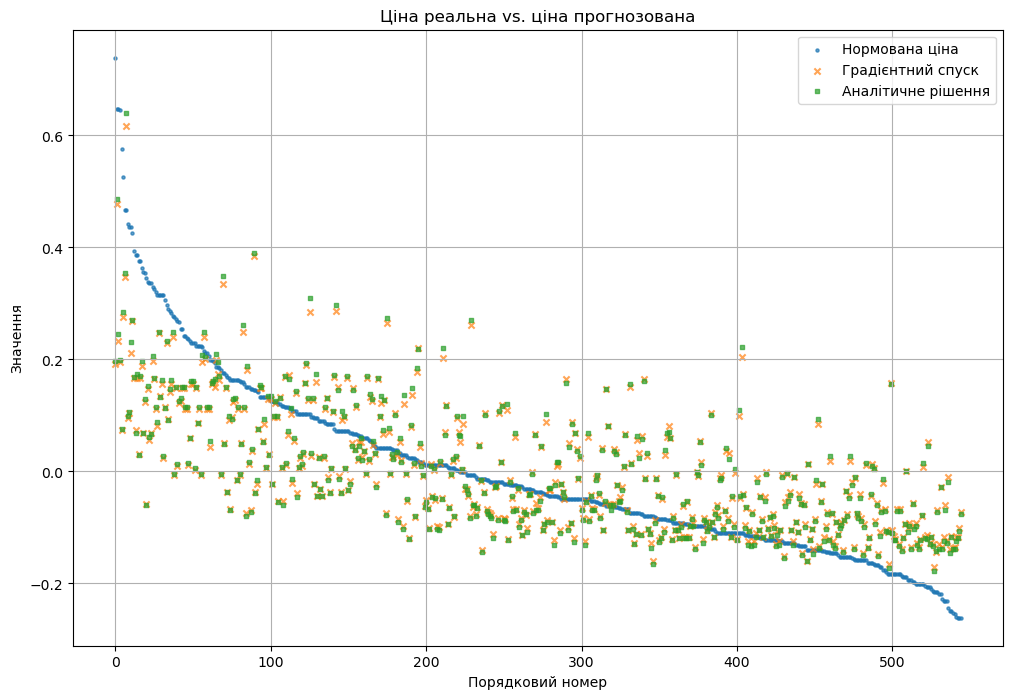

In [39]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(comparison)), comparison['ActualPrice'], label='Нормована ціна', marker='o', s=5, alpha=0.7)
plt.scatter(range(len(comparison)), comparison['GradientDescent'], label='Градієнтний спуск', marker='x', s=20, alpha=0.7)
plt.scatter(range(len(comparison)), comparison['AnalyticalSolution'], label='Аналітичне рішення', marker='s', s=5, alpha=0.7)

plt.title('Ціна реальна vs. ціна прогнозована')
plt.xlabel('Порядковий номер')
plt.ylabel('Значення')
plt.legend()
plt.grid()
plt.show()